# WILL BE MARKDOWNED LATER

In [1]:
from utils.build_machine_translation import MachineTranslation
from utils.build_vocab import Vocab
import torch
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
PATH = '../data/fra-eng/fra.txt'
data = MachineTranslation(PATH, batch_size=3)

In [3]:
raw_text = data.load_dataset()

text = data._preprocess(raw_text)
text[:80]

'go .\tva !\nhi .\tsalut !\nrun !\tcours !\nrun !\tcourez !\nwho ?\tqui ?\nwow !\tça alors !'

In [4]:
src, tgt = data._tokenize(text)
src[:5], tgt[:5]

([['go', '.', '<eos>'],
  ['hi', '.', '<eos>'],
  ['run', '!', '<eos>'],
  ['run', '!', '<eos>'],
  ['who', '?', '<eos>']],
 [['va', '!', '<eos>'],
  ['salut', '!', '<eos>'],
  ['cours', '!', '<eos>'],
  ['courez', '!', '<eos>'],
  ['qui', '?', '<eos>']])

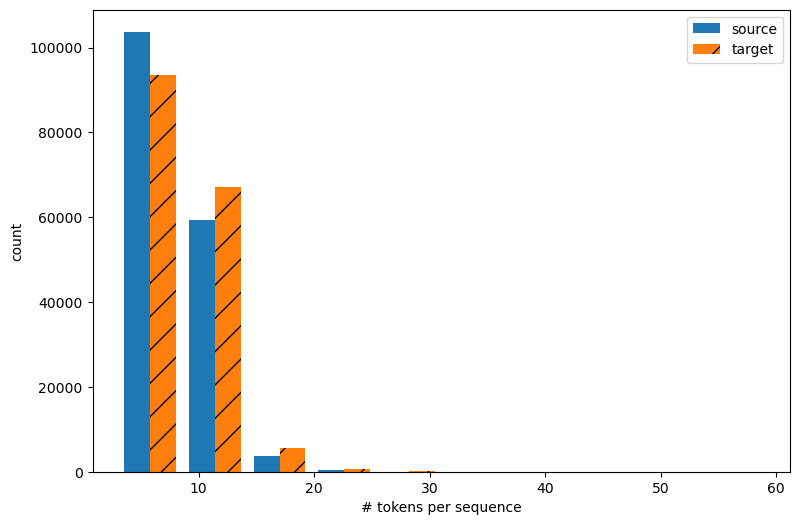

In [5]:
data.histogram_tokens_per_seq(['source', 'target'], '# tokens per sequence', 'count', src, tgt)

In [6]:
data = MachineTranslation(PATH, batch_size=3)
src, tgt, src_valid_len, label = next(iter(data.train_dataloader()))
print('source:', src.type(torch.int32))
print('decoder input:', tgt.type(torch.int32))
print('source len excluding pad:', src_valid_len.type(torch.int32))
print('label:', label.type(torch.int32))

source: tensor([[177,   0,   3,   4,   4,   4,   4,   4,   4],
        [ 11, 168,   2,   3,   4,   4,   4,   4,   4],
        [ 86,  54,   2,   3,   4,   4,   4,   4,   4]], dtype=torch.int32)
decoder input: tensor([[  3,  21,   0,   4,   5,   5,   5,   5,   5],
        [  3,  60, 210, 192,   2,   4,   5,   5,   5],
        [  3, 108, 183,   6,   0,   4,   5,   5,   5]], dtype=torch.int32)
source len excluding pad: tensor([3, 4, 4], dtype=torch.int32)
label: tensor([[ 21,   0,   4,   5,   5,   5,   5,   5,   5],
        [ 60, 210, 192,   2,   4,   5,   5,   5,   5],
        [108, 183,   6,   0,   4,   5,   5,   5,   5]], dtype=torch.int32)


In [7]:
src, tgt, _,  _ = data.build(['hi .'], ['salut .'])
print('source:', data.src_vocab.to_tokens(src[0].type(torch.int32)))
print('target:', data.tgt_vocab.to_tokens(tgt[0].type(torch.int32)))

source: ['hi', '.', '<eos>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
target: ['<bos>', 'salut', '.', '<eos>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
